<a href="https://colab.research.google.com/github/Kim-JungHyun01/AIStudy24/blob/master/%ED%85%8C%EC%8A%A4%ED%8A%B8/%EA%B2%B0%EC%A0%95%ED%8A%B8%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 시나리오
- 신상품 : 캔 와인
- 주류는 온라인 판매가 안되기에 온라인 예약 후, 오프라인매장에서 구매유도
- 근데, 입고된 와인이 레드 or 화이트인지 구분표시가 안되있음
- 캔에 인쇄된 라벨정보 : 알콜도수, 당도, pH 값(alcohol,sugar,pH,class)
    - 품질확인용으로 개방한 캔 : 테스트용
- 로지스틱 회귀모델 적용

# 데이터 준비
- 와인의 특성화된 데이터

In [35]:
import pandas as pd

wine = pd.read_csv('http://bit.ly/wine_csv_data')
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


# input, traget
- input : 알콜(alcohol), 당도(sugar), 산도(pH)
- target(class) : 0(레드와인), 1(화이트와인)
    - 양성클래스이면 화이트와인

## .info()
- 샘플 갯수, 열(실수) 확인
- Non-Null : 누락된 값 없음

In [36]:
wine.info()
# 6497의 샘플과 4개의 열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


## .describe()
- 열에 대한 통계
- mean : 평균
- std : 표준편차
- min : 최소
- 25% : 1 사분위
- 50% : 중간값(2 사분위)
- 75% : 3 사분위
- max(100%) : 4사분위수(최대)
    - 사분위수 : 데이터를 순서대로 4등분한 값

In [37]:
wine.describe()

,alcohol,sugar,pH,class
count,6497.000000,6497.000000,6497.000000,6497.000000
mean,10.491801,5.443235,3.218501,0.753886
std,1.192712,4.757804,0.160787,0.430779
min,8.000000,0.600000,2.720000,0.000000
25%,9.500000,1.800000,3.110000,1.000000
50%,10.300000,3.000000,3.210000,1.000000
75%,11.300000,8.100000,3.320000,1.000000
max,14.900000,65.800000,4.010000,1.000000


# 데이터 전처리
- 알콜도수, 당도, pH의 스케일이 다름
- StandardScaler 클래스로 특성을 표준화

In [38]:
import numpy as np

#훈련 입력값(input) : 처음 3개의 열을 배열로 바꿈 : 2차원
data = wine[['alcohol','sugar','pH']].to_numpy()

# class 열을 배열로 바꿈 : 1차원
target = wine['class'].to_numpy()

print(data)
print()
print(target)

[[ 9.4   1.9   3.51]
 [ 9.8   2.6   3.2 ]
 [ 9.8   2.3   3.26]
 ...
 [ 9.4   1.2   2.99]
 [12.8   1.1   3.34]
 [11.8   0.8   3.26]]

[0. 0. 0. ... 1. 1. 1.]


In [39]:
#test_size : 세트구분범위지정_기본값 25 : 75
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(data, target, test_size = 0.2, random_state = 42)
print("train : ", train_input.shape, " test : ", test_input.shape)

train :  (5197, 3)  test :  (1300, 3)


In [40]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

print(train_scaled[:5])
print()
print(test_scaled[:5])

[[ 0.01376574  0.4646116  -0.16888369]
 [ 1.60871671 -0.70299854  0.26967864]
 [ 1.10504798 -0.70299854  1.20945505]
 [ 1.0211032  -0.89065017  0.958848  ]
 [-0.99357172  2.07007555 -0.67009777]]

[[ 1.44082714  1.52797084  0.26967864]
 [-0.48990299 -0.68214836  0.3323304 ]
 [ 1.27293756  0.40206106 -0.23153545]
 [-0.82568214  1.19436794 -0.60744601]
 [-1.32935087  1.75732283 -0.67009777]]


# 로지스틱 회귀모델

In [41]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_scaled, train_target)

print("train : ", lr.score(train_scaled, train_target))
print("test  : ", lr.score(test_scaled, test_target))
#결론 : tarin(0.780), test(0.778) => 80%이하 => 과소적합

train :  0.7808350971714451
test  :  0.7776923076923077


In [42]:
#계수 = 가중치, 절편 = 더해지는 값
print("계수 : ", lr.coef_," 절편 : ", lr.intercept_)

계수 :  [[ 0.51268071  1.67335441 -0.68775646]]  절편 :  [1.81773456]


## 결론(보고서)
- 선형방정식 : z =  0.51268071 * (알콜도수) + 1.67335441 * (당도) - 0.68775646 * (pH) + 1.81773456
- 음수이면 레드와인, 양수이면 화이트와인으로 판단
- 현재 77.78%정도로 분류가능

# 결정트리(DecisionTreeClassifier)
- if문을 사용하는 것과 유사
- 루트노드 : 최상위 노드(depth = 0)
- 리프노드 : 최하위 노드(맨마지막 노드)

<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbGlghI%2FbtqwYFXZzCu%2F0g4cMFuumUkKDYmDfkMdu0%2Fimg.png" width=320px>
<img src = "https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbJSlvg%2FbtqwXHvdrPJ%2FZhikSUKx3SmuYZSz6NGZL1%2Fimg.png" width=320px>
<img src="https://img1.daumcdn.net/thumb/R1280x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2FbUvjhU%2FbtqwYiIK85s%2FoQ3KuTZVk6CgSAQI0VkwW1%2Fimg.png" width=320px>

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(train_scaled, train_target)

print("train : ", dt.score(train_scaled, train_target))
print("test  : ", dt.score(test_scaled, test_target))
#결론 : tarin(0.996) > test(0.859) => train점수 100%에 가까움 => 과대적합

train :  0.996921300750433
test  :  0.8592307692307692


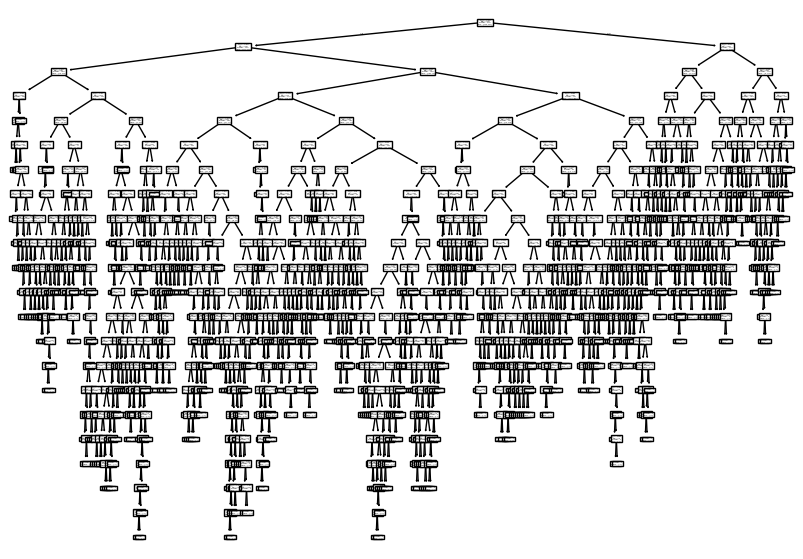

In [44]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

#figsize = (20, 15) 그래프의 사이즈(가로인치, 세로인치)
plt.figure(figsize=(10, 7))
plot_tree(dt)
plt.show()
# 맨위 노드(루트노드), 맨아래 노드(리프노드)

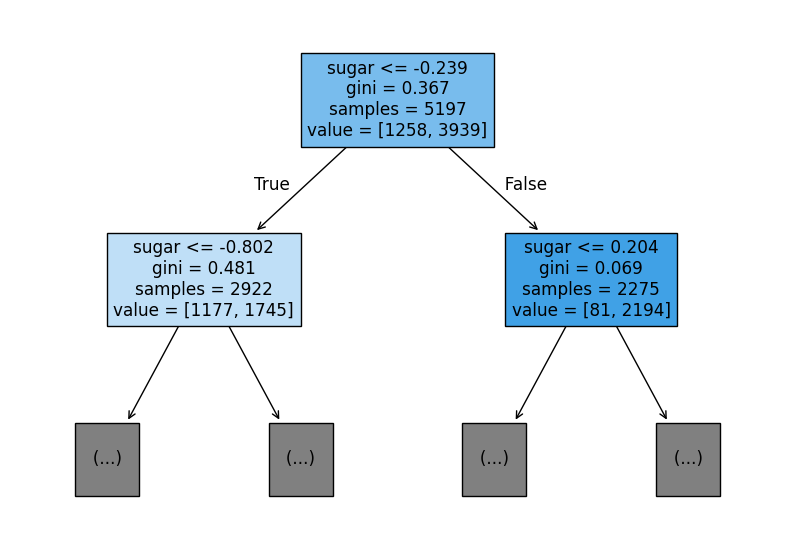

In [45]:
#적당한 구간에서 멈추기
plt.figure(figsize=(10,7))

# max_depth = 1 : 루트노드제외
# filled : 클래스에 맞게 색칠
plot_tree(dt, max_depth=1, filled = True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

## 결론
- sugar : -0.239이하 여부로 True, False구분
- sample(총샘플수) = 5197
- value(값) : 1258(0(레드), 음성클래스), 3939(1(화이트), 양성클래스)
    - 아래 왼쪽 노드 : 당도가 더 낮은지를 물어보는 노드 (-0.802) => 이하면 True(음성클래스:1177개), False(양성클래스:1745개)
    - 아래 오른쪽 노드 : 당도가 더 높은지 (0.204)                => 이하면 True(음성클래스:81개),   False(양성클래스:2194개)
        - 대부분이 화이트 와인 샘플이 오른쪽 노드로 이동(1745+2194=3939 : 화이트와인_양성클래슨)

바탕색이 루트노드보다 더 진하고, 왼쪽 노드가 연해짐

filled = Ture로 인해 클래스마다 색깔을 지정

비율이 높아지면 점점 진하게 표현

리프노드에서 가장 많은 클래스가 예측 클래스가 됨

만약 이 결정트리로 성장을 멈춘다면 왼쪽 노드에 도달한 샘플과 오른쪽 노드에 도달한 샘플은 모두 양성클래스로 예측된다.

왜냐하면, 양성 클래스가 많아서 => 노드수를 더 늘려야함

## gini(불순도)
- 결과 : 0.367
- 노드에서 데이터를 분활할 기준을 정하는 값

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5BAT6Ioz7ZpB2Frusp8DT1KQvgQkK3plGhg&s">
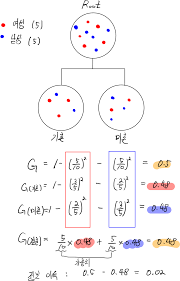

## 가지치기
- 열매를 잘 맺기 위한 작업
- 가지치기를 하지 않으면 끝까지 자라는 나무가 만들어짐
- 트리의 깊이(depth)를 조정

### 노드수 조정(max_depth)

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=3, random_state=42)
dt.fit(train_scaled, train_target)

print("train : ", dt.score(train_scaled, train_target))
print("test  : ", dt.score(test_scaled, test_target))
#결론 : train(0.845) > test(0.842)

train :  0.8454877814123533
test  :  0.8415384615384616


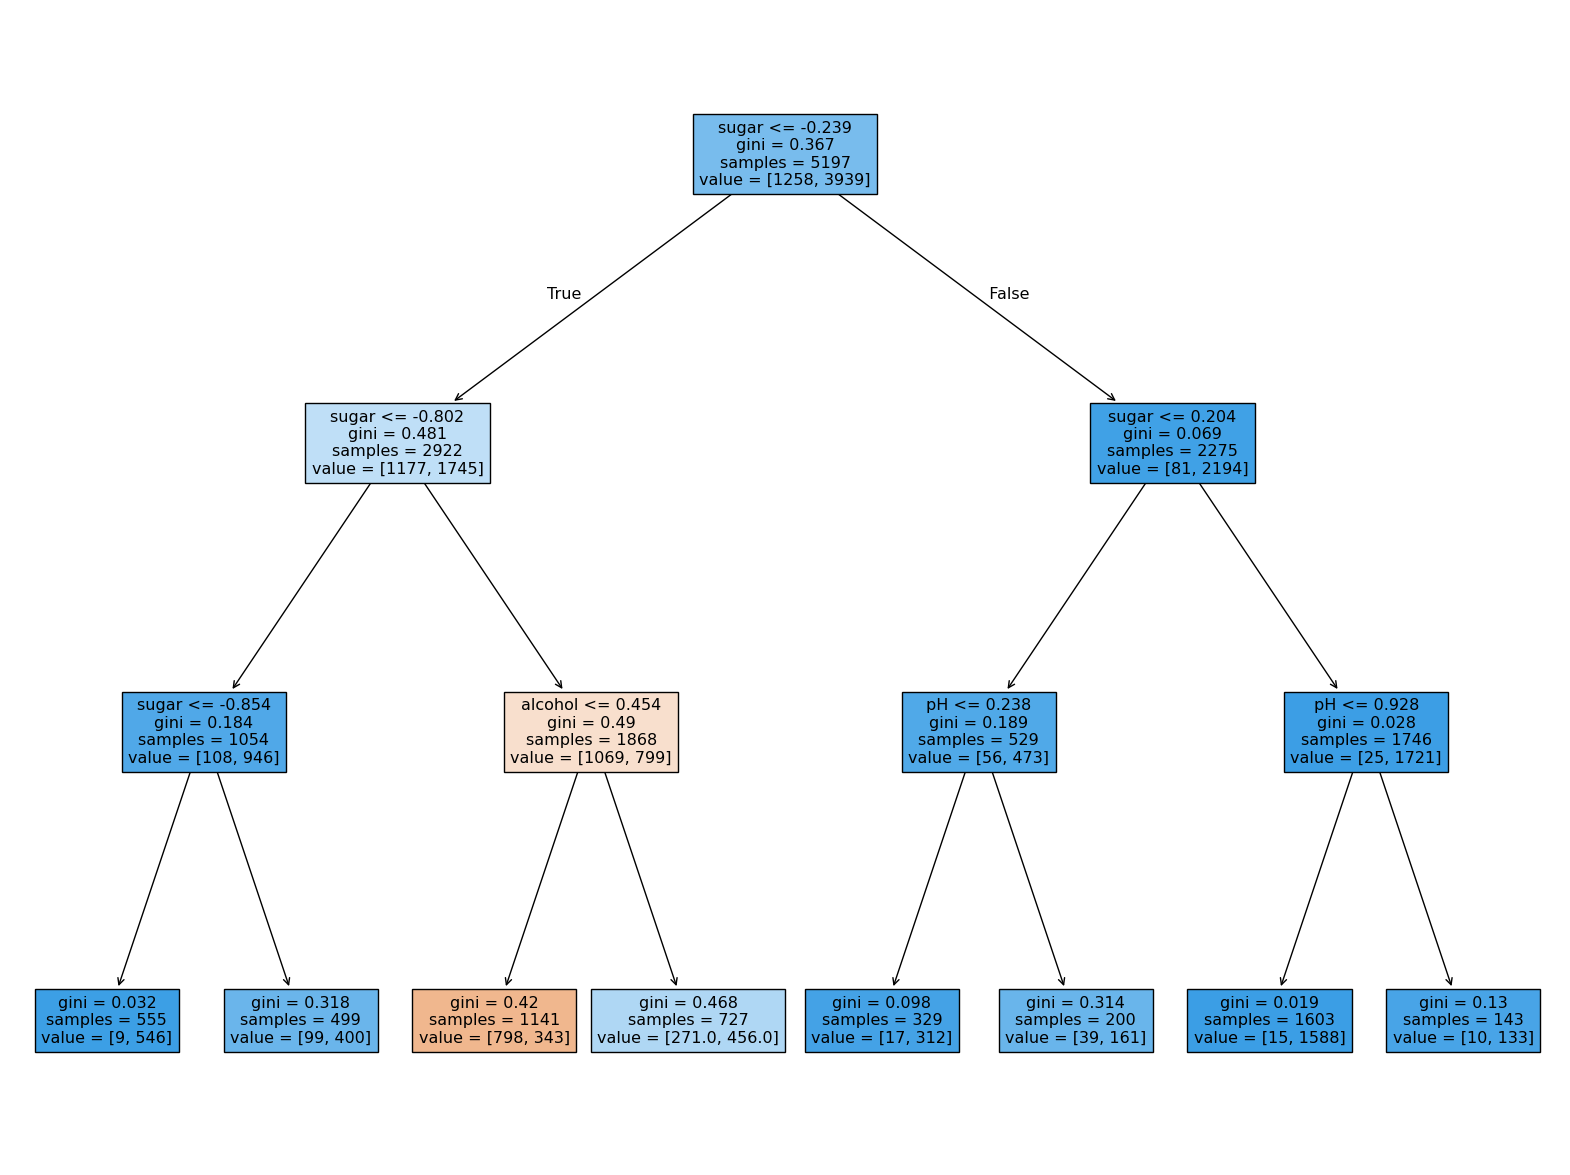

In [48]:
plt.figure(figsize=(20, 15))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

## 결론(그래프분석)
- 루프노드(depth = 0) 다음 깊에 있는 depth = 1 노드는 모두 당도를 기준으로 훈련세트를 나눔
- depth = 2
    - 1 : 당도
    - 2 : 알코올도수(alcohol)
    - 3,4 : pH
- depth = 3(리프노드)
    - 3번째 노드만 음성클래스가 더 많음 => 여기에 도달해야 레드와인이라고 판단
- 레드와인 판단기준
    - -0.802 < 당도 < -0.239
    - alcohol < 0.4154

## 한계점 & 재분석
-0.802라는 음수로된 당도를 보고가능? => 전처리할 필요가 있을까?

판단 : 표준화 전처리를 하지 않고 진행(특성값에 스케일의 영향x)

In [50]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth = 3, random_state=42)
dt.fit(train_input, train_target)

print("train : ", dt.score(train_input, train_target))
print("test  : ", dt.score(test_input, test_target))
#결론 : train(0.845) > test(0.842) : 표준화한 것과 차이x

train :  0.8454877814123533
test  :  0.8415384615384616


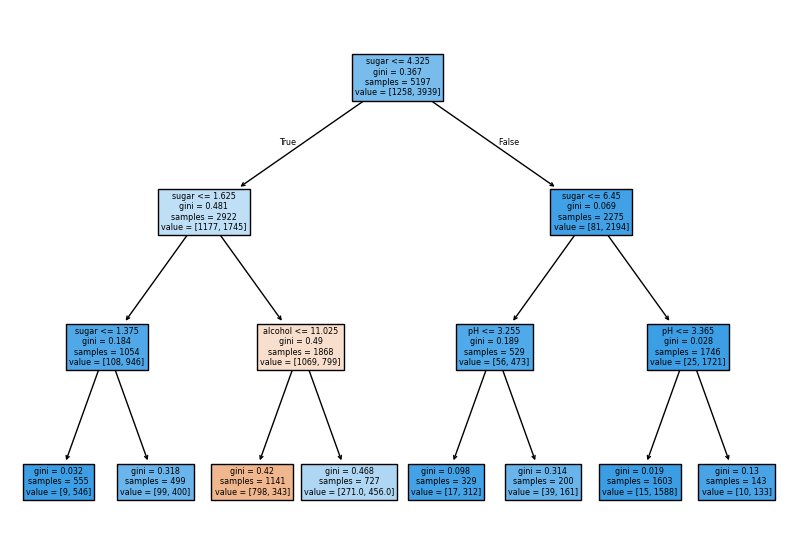

In [54]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()

- 레드와인 판단기준
    - 1.625 < 당도 <= 4.325
    - alcohol <= 11.025

## .feature_importances_
- 특성중요도(가중치)를 계산
- 총합 : 1
- 순서 : input데이터만들때 넣은 열의 순(입력값)

In [56]:
print("특성중요도 :", dt.feature_importances_)
"""
  'alcohol'   'sugar'     'pH'
[0.12345626 0.86862934 0.0079144 ]
"""

특성중요도 :  [0.12345626 0.86862934 0.0079144 ]


## min_impurity_decrease
- 불순도의 최소화를 결정하는 변수

In [57]:
from sklearn.tree import DecisionTreeClassifier

#min_impurity_decrease : 최소불순도
dt = DecisionTreeClassifier(min_impurity_decrease=0.0005, random_state=42)
dt.fit(train_input, train_target)

print("train : ", dt.score(train_input, train_target))
print("test  : ", dt.score(test_input, test_target))
#결론 : train(0.887) > test0.862)

train :  0.8874350586877044
test  :  0.8615384615384616


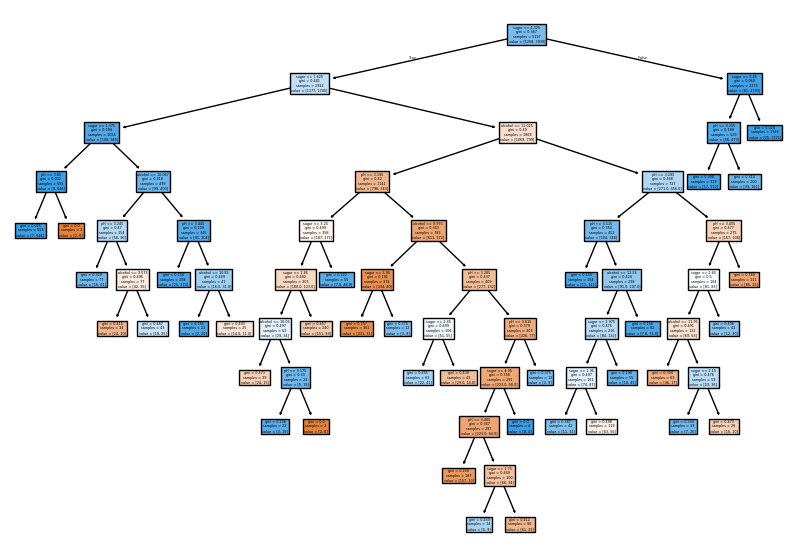

In [58]:
plt.figure(figsize=(10, 7))
plot_tree(dt, filled = True, feature_names=['alcohol', 'sugar', 'pH'])

plt.show()